# On the Prediction of Software Defects for Embedded Real-time Systems

# Multilayer perceptron

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pickle
import math
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Loading the data from the Pickle files

In [2]:
with open('x_train.pkl', 'rb') as f:
    x_train = pickle.load(f)

with open('x_test.pkl', 'rb') as f:
    x_test = pickle.load(f)

with open('y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)
    
with open('x_traincm1.pkl', 'rb') as f:
    x_traincm1 = pickle.load(f)

with open('x_testcm1.pkl', 'rb') as f:
    x_testcm1 = pickle.load(f)

with open('y_traincm1.pkl', 'rb') as f:
    y_traincm1 = pickle.load(f)

with open('y_testcm1.pkl', 'rb') as f:
    y_testcm1 = pickle.load(f)
    
with open('x_trainjm1.pkl', 'rb') as f:
    x_trainjm1 = pickle.load(f)

with open('x_testjm1.pkl', 'rb') as f:
    x_testjm1 = pickle.load(f)

with open('y_trainjm1.pkl', 'rb') as f:
    y_trainjm1 = pickle.load(f)

with open('y_testjm1.pkl', 'rb') as f:
    y_testjm1 = pickle.load(f)
    
with open('x_trainkc1.pkl', 'rb') as f:
    x_trainkc1 = pickle.load(f)

with open('x_testkc1.pkl', 'rb') as f:
    x_testkc1 = pickle.load(f)

with open('y_trainkc1.pkl', 'rb') as f:
    y_trainkc1 = pickle.load(f)

with open('y_testkc1.pkl', 'rb') as f:
    y_testkc1 = pickle.load(f)
    
with open('x_trainkc2.pkl', 'rb') as f:
    x_trainkc2 = pickle.load(f)

with open('x_testkc2.pkl', 'rb') as f:
    x_testkc2 = pickle.load(f)

with open('y_trainkc2.pkl', 'rb') as f:
    y_trainkc2 = pickle.load(f)

with open('y_testkc2.pkl', 'rb') as f:
    y_testkc2 = pickle.load(f)
    
with open('x_trainpc1.pkl', 'rb') as f:
    x_trainpc1 = pickle.load(f)

with open('x_testpc1.pkl', 'rb') as f:
    x_testpc1 = pickle.load(f)

with open('y_trainpc1.pkl', 'rb') as f:
    y_trainpc1 = pickle.load(f)

with open('y_testpc1.pkl', 'rb') as f:
    y_testpc1 = pickle.load(f)
    
with open('y_train_before1.pkl', 'rb') as f:
    y_train_before = pickle.load(f)

with open('y_test_before1.pkl', 'rb') as f:
    y_test_before = pickle.load(f)
    
    
    
with open('y_train_before1cm1.pkl', 'rb') as f:
    y_train_beforecm1 = pickle.load(f)

with open('y_test_before1cm1.pkl', 'rb') as f:
    y_test_beforecm1 = pickle.load(f)
    
with open('y_train_before1jm1.pkl', 'rb') as f:
    y_train_beforejm1 = pickle.load(f)

with open('y_test_before1jm1.pkl', 'rb') as f:
    y_test_beforejm1 = pickle.load(f)
    
with open('y_train_before1kc1.pkl', 'rb') as f:
    y_train_beforekc1 = pickle.load(f)

with open('y_test_before1kc1.pkl', 'rb') as f:
    y_test_beforekc1 = pickle.load(f)
    
with open('y_train_before1kc2.pkl', 'rb') as f:
    y_train_beforekc2 = pickle.load(f)

with open('y_test_before1kc2.pkl', 'rb') as f:
    y_test_beforekc2 = pickle.load(f)
    
with open('y_train_before1pc1.pkl', 'rb') as f:
    y_train_beforepc1 = pickle.load(f)

with open('y_test_before1pc1.pkl', 'rb') as f:
    y_test_beforepc1 = pickle.load(f)

# Creating a two layer perceptron based neural network

In [3]:
def network_architecture(x, hid1_size, hid2_size):
    '''
    Creates a 2-layer perceptron based on hidden sizes
    '''
    # Input layer -> Hidden layer
    W1 = tf.Variable(tf.random_normal([21, hid1_size]), trainable=True, name = 'W1')
    # Hidden layer -> Output layer
    W2 = tf.Variable(tf.random_normal([hid1_size, hid2_size]), trainable=True, name = 'W2')

    # Hidden layer
    hid_out1 = tf.matmul(x, W1)
    hid_out2 = tf.nn.bias_add(hid_out1, tf.constant(1, dtype=tf.float32, shape=[hid1_size]), name='Bias1')
    hid_out = tf.nn.sigmoid(hid_out2)

    # Output Layer
    out1 = tf.matmul(hid_out, W2)
    out2 = tf.nn.bias_add(out1, tf.constant(1, dtype=tf.float32, shape=[hid2_size]), name='Bias2')
    out  = out2 
    
    return out

# Tunning Hyper-parameters

In [4]:
## Hyperparameters
l_rate        = 1e-4
epochs        = 500
batch_size    = 300
hidden1_size  = 20
hidden2_size  = 2

# Training two layer perceptron based neural network

In [5]:
def two_layer_perceptron(x_train, y_train, x_test, y_test):
    # Input Placeholders 
    x = tf.placeholder(tf.float32, [None, 21])
    y = tf.placeholder(tf.float32, [None, 2]) 
    # Create network
    y_ = network_architecture(x, hidden1_size, hidden2_size)
    # Loss function
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_)) 
    # Optimization algorithm
    
    optim = tf.train.AdamOptimizer(learning_rate=l_rate).minimize(cross_entropy)
    # Initializer
    init_op = tf.global_variables_initializer()

    # Accuracy
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    print('Training_Set: ', len(x_train))
    print('Testing_Set : ', len(x_test))

    cost = []

    with tf.Session() as sess: 
        sess.run(init_op)
        for epoch in range(epochs):
            #x_train, y_train = shuffle_in_unison(x_train, y_train)
            for batch in range(0, len(x_train), batch_size):
                batch_x = x_train[batch:(batch+batch_size)]
                batch_y = y_train[batch:(batch+batch_size)]
                
            _, loss = sess.run([optim, cross_entropy], feed_dict = {x : batch_x, y : batch_y})
        
        cost.append(loss)
        print("\nTraining Done!")
        print('The accuracy for our test batch is   ', sess.run(accuracy, feed_dict={x: x_test, y: y_test}))
    sess.close()
    
    return cost

In [14]:
cost = two_layer_perceptron(x_train, y_train, x_test, y_test)
costcm1 = two_layer_perceptron(x_traincm1, y_traincm1, x_testcm1, y_testcm1)
costjm1 = two_layer_perceptron(x_trainjm1, y_trainjm1, x_testjm1, y_testjm1)
costkc1 = two_layer_perceptron(x_trainkc1, y_trainkc1, x_testkc1, y_testkc1)
costkc2 = two_layer_perceptron(x_trainkc2, y_trainkc2, x_testkc2, y_testkc2)
costpc1 = two_layer_perceptron(x_trainpc1, y_trainpc1, x_testpc1, y_testpc1)

print(cost.shape)

Training_Set:  12098
Testing_Set :  3025

Training Done!
The accuracy for our test batch is    0.827438
Training_Set:  398
Testing_Set :  100

Training Done!
The accuracy for our test batch is    0.92
Training_Set:  8708
Testing_Set :  2177

Training Done!
The accuracy for our test batch is    0.80248
Training_Set:  1687
Testing_Set :  422

Training Done!
The accuracy for our test batch is    0.194313
Training_Set:  417
Testing_Set :  105

Training Done!
The accuracy for our test batch is    0.790476
Training_Set:  887
Testing_Set :  222

Training Done!
The accuracy for our test batch is    0.68018


AttributeError: 'list' object has no attribute 'shape'

In [10]:
%matplotlib inline
ax = np.floor(np.linspace(0, epochs, epochs))
plt.plot(ax, cost, color='b')
plt.title('Training loss', fontsize=15)
plt.xlabel('epochs')
plt.ylabel('loss')
pp = PdfPages('TrainingLossOverall.pdf')
pp.savefig(plt)
pp.close()

ValueError: x and y must have same first dimension, but have shapes (500,) and (1,)

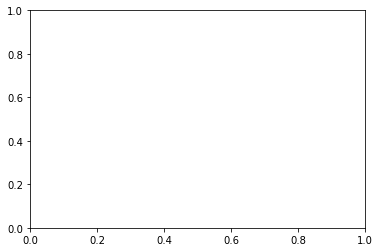

In [11]:
traininglossPlot(cost)

In [15]:
print('Training_Set: ', len(x_trainjm1))
print('Testing_Set : ', len(x_testjm1))

cost = []

with tf.Session() as sess: 
    sess.run(init_op)
    for epoch in range(epochs):
        #x_train, y_train = shuffle_in_unison(x_train, y_train)
        for batch in range(0, len(x_trainjm1), batch_size):
            batch_x = x_trainjm1[batch:(batch+batch_size)]
            batch_y = y_trainjm1[batch:(batch+batch_size)]
            
            _, loss = sess.run([optim, cross_entropy], feed_dict = {x : batch_x, y : batch_y})
        
        cost.append(loss)
    
    print("\nTraining Done!")
    print('The accuracy for our test batch is   ', sess.run(accuracy, feed_dict={x: x_testjm1, y: y_testjm1}))
    
sess.close()

Training_Set:  8708
Testing_Set :  2177


NameError: name 'init_op' is not defined

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = np.floor(np.linspace(0, epochs, epochs))
plt.plot(ax, cost, color='b')
plt.title('Training loss for JM1', fontsize=15)
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
print('Training_Set: ', len(x_trainkc1))
print('Testing_Set : ', len(x_testkc1))

cost = []

with tf.Session() as sess: 
    sess.run(init_op)
    for epoch in range(epochs):
        #x_train, y_train = shuffle_in_unison(x_train, y_train)
        for batch in range(0, len(x_trainkc1), batch_size):
            batch_x = x_trainkc1[batch:(batch+batch_size)]
            batch_y = y_trainkc1[batch:(batch+batch_size)]
            
            _, loss = sess.run([optim, cross_entropy], feed_dict = {x : batch_x, y : batch_y})
        
        cost.append(loss)
    
    print("\nTraining Done!")
    print('The accuracy for our test batch is   ', sess.run(accuracy, feed_dict={x: x_testkc1, y: y_testkc1}))
    
sess.close()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = np.floor(np.linspace(0, epochs, epochs))
plt.plot(ax, cost, color='b')
plt.title('Training loss KC1', fontsize=15)
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
print('Training_Set: ', len(x_trainkc2))
print('Testing_Set : ', len(x_testkc2))

cost = []

with tf.Session() as sess: 
    sess.run(init_op)
    for epoch in range(epochs):
        #x_train, y_train = shuffle_in_unison(x_train, y_train)
        for batch in range(0, len(x_train), batch_size):
            batch_x = x_trainkc2[batch:(batch+batch_size)]
            batch_y = y_trainkc2[batch:(batch+batch_size)]
            
            _, loss = sess.run([optim, cross_entropy], feed_dict = {x : batch_x, y : batch_y})
        
        cost.append(loss)
    
    print("\nTraining Done!")
    print('The accuracy for our test batch is   ', sess.run(accuracy, feed_dict={x: x_testkc2, y: y_testkc2}))
    
sess.close()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = np.floor(np.linspace(0, epochs, epochs))
plt.plot(ax, cost, color='b')
plt.title('Training loss', fontsize=15)
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
print('Training_Set: ', len(x_trainpc1))
print('Testing_Set : ', len(x_testpc1))

cost = []

with tf.Session() as sess: 
    sess.run(init_op)
    for epoch in range(epochs):
        #x_train, y_train = shuffle_in_unison(x_train, y_train)
        for batch in range(0, len(x_trainpc1), batch_size):
            batch_x = x_trainpc1[batch:(batch+batch_size)]
            batch_y = y_trainpc1[batch:(batch+batch_size)]
            
            _, loss = sess.run([optim, cross_entropy], feed_dict = {x : batch_x, y : batch_y})
        
        cost.append(loss)
    
    print("\nTraining Done!")
    print('The accuracy for our test batch is   ', sess.run(accuracy, feed_dict={x: x_testpc1, y: y_testpc1}))
    
sess.close()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = np.floor(np.linspace(0, epochs, epochs))
plt.plot(ax, cost, color='b')
plt.title('Training loss KC1', fontsize=15)
plt.xlabel('epochs')
plt.ylabel('loss')

# Training Loss

In [ ]:
print('Training_Set: ', len(x_traincm1))
print('Testing_Set : ', len(x_testcm1))

cost = []

with tf.Session() as sess: 
    sess.run(init_op)
    for epoch in range(epochs):
        #x_train, y_train = shuffle_in_unison(x_train, y_train)
        for batch in range(0, len(x_traincm1), batch_size):
            batch_x = x_traincm1[batch:(batch+batch_size)]
            batch_y = y_traincm1[batch:(batch+batch_size)]
            
            _, loss = sess.run([optim, cross_entropy], feed_dict = {x : batch_x, y : batch_y})
        
        cost.append(loss)
    
    print("\nTraining Done!")
    print('The accuracy for our test batch is   ', sess.run(accuracy, feed_dict={x: x_testcm1, y: y_testcm1}))
    
sess.close()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = np.floor(np.linspace(0, epochs, epochs))
plt.plot(ax, cost, color='b')
plt.title('Training loss for CM1', fontsize=15)
plt.xlabel('epochs')
plt.ylabel('loss')

# Changing Hidden layer size and checking Accuracy

In [17]:
del sess

In [21]:
def multi_layer_perceptron(x_train, y_train, x_test, y_test):
    # Delete any previous sessions
    layer_size_cost = {}
    for i in range(3, 21):
        print('Current Hidden Layer Size:', i)
        # Hidden layer sizes
        hidden1_size  = i
        hidden2_size  = 2
        
        # Input Placeholders 
        x = tf.placeholder(tf.float32, [None, 21])
        y = tf.placeholder(tf.float32, [None, 2]) 
        
        # Create network
        y_ = network_architecture(x, hidden1_size, hidden2_size)
        
        # Loss function
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_)) 
        
        # Optimization algorithm
        optim = tf.train.AdamOptimizer(learning_rate=l_rate).minimize(cross_entropy)
    
        # Initializer
        init_op = tf.global_variables_initializer()
    
        # Accuracy
        correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

        # Training Loss
        cost = []

        with tf.Session() as sess: 
            sess.run(init_op)
            for epoch in range(epochs):
                #x_train, y_train = shuffle_in_unison(x_train, y_train)
                for batch in range(0, len(x_train), batch_size):
                    batch_x = x_train[batch:(batch+batch_size)]
                    batch_y = y_train[batch:(batch+batch_size)]

                _, loss = sess.run([optim, cross_entropy], feed_dict = {x : batch_x, y : batch_y})

                cost.append(loss)

            print("\nTraining Done!")
            current_hidden_size_acc = sess.run(accuracy, feed_dict={x: x_test, y: y_test})
            print('The accuracy for our test batch is: ', current_hidden_size_acc)

        sess.close()
    
        # Save the loss and accuracy into a dict 
        layer_size_cost[str(i)] = cost
        layer_size_cost[(str(i) + '_acc')] = current_hidden_size_acc

        # Delete previous session
        del sess
    
    
        return layer_size_cost

In [22]:
layer_size_cost = multi_layer_perceptron(x_train, y_train, x_test, y_test)
# layer_size_costcm1 = multi_layer_perceptron(x_traincm1, y_traincm1, x_testcm1, y_testcm1)
# layer_size_costjm1 = multi_layer_perceptron(x_trainjm1, y_trainjm1, x_testjm1, y_testjm1)
# layer_size_costkc1 = multi_layer_perceptron(x_trainkc1, y_trainkc1, x_testkc1, y_testkc1)
# layer_size_costkc2 = multi_layer_perceptron(x_trainkc2, y_trainkc2, x_testkc2, y_testkc2)
# layer_size_costpc1 = multi_layer_perceptron(x_trainpc1, y_trainpc1, x_testpc1, y_testpc1)

Current Hidden Layer Size: 3

Training Done!
The accuracy for our test batch is:  0.230413


# Plot Accuracy-vs-Hidden Layer Increments

In [ ]:
def plot_accuracy_hidden()
layer_size_vs_acc = []

for i in range(3, 21, 1):
    get_acc = str(i) + '_acc'
    layer_size_vs_acc.append(layer_size_cost[get_acc])
    ax = np.floor(np.linspace(3, 20, 18))
    
plt.plot(ax, layer_size_vs_acc )
plt.title('Test Accuracy vs Hidden Layer Size', fontsize=15)
plt.xlabel('Hidden Layer Size')
plt.ylabel('Test Accuracy')

In [ ]:
plot_accuracy_hidden(layer_size_cost)

In [ ]:
def training_error_vs_epoch():
    ax = np.floor(np.linspace(3, 20, 500))
    for i in range(3, 20, 4):
        plt.plot(ax, layer_size_cost[str(i)], label='$Hidden size = {i}$'.format(i=i))
    
    plt.legend(loc='best')
    plt.title('Training error vs Epoch', fontsize=15)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')